In [ ]:
# Ad: Hilmi Tunahan
# Soyad: Başar
# Okul Numara: 2112721019
# GitHub Repo Bağlantısı: https://github.com/tunaBasar/MachineLearning.git

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

base_dir = 'dataset'
img_width, img_height = 128, 128
batch_size = 32


2025-12-12 15:08:49.127305: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model 2 (Basit CNN) için kütüphaneler yüklendi.


In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # %20 Test/Validation verisi
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

print(f"Sınıflar: {train_generator.class_indices}")

Found 261 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
Sınıflar: {'etiketli': 0, 'etiketsiz': 1}


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/home/tuna/Desktop/HomeWorks/MachineLearning/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-12 15:08:59.130606: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-12-12 15:08:59.130632: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:160] env: CUDA_VISIBLE_DEVICES="-1"
2025-12-12 15:08:59.130637: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-12-12 15:08:59.130639: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] ve

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15
)

Epoch 1/15


2025-12-12 15:09:12.479358: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 65028096 exceeds 10% of free system memory.


1/9 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.4688 - loss: 0.6950

2025-12-12 15:09:12.785773: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 65028096 exceeds 10% of free system memory.
2025-12-12 15:09:14.356550: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 65028096 exceeds 10% of free system memory.
2025-12-12 15:09:14.525172: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 65028096 exceeds 10% of free system memory.


2/9 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4766 - loss: 0.9665

2025-12-12 15:09:16.170208: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 65028096 exceeds 10% of free system memory.


9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4789 - loss: 0.8507 - val_accuracy: 0.5625 - val_loss: 0.6854
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6552 - loss: 0.6360 - val_accuracy: 0.5938 - val_loss: 0.7375
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7203 - loss: 0.5517 - val_accuracy: 0.5938 - val_loss: 0.9646
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7165 - loss: 0.5523 - val_accuracy: 0.6719 - val_loss: 0.8422
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7969 - loss: 0.4322 - val_accuracy: 0.6406 - val_loss: 1.3014
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8238 - loss: 0.4276 - val_accuracy: 0.6875 - val_loss: 1.0670
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8352 - loss: 0.3717 - val_accuracy: 0.6719 - val_loss: 1.2874
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9042 - loss: 0.2674 - val_accuracy: 0.6875 - val_loss: 1.2123
Epoch 9/15
9/9 ━━━━

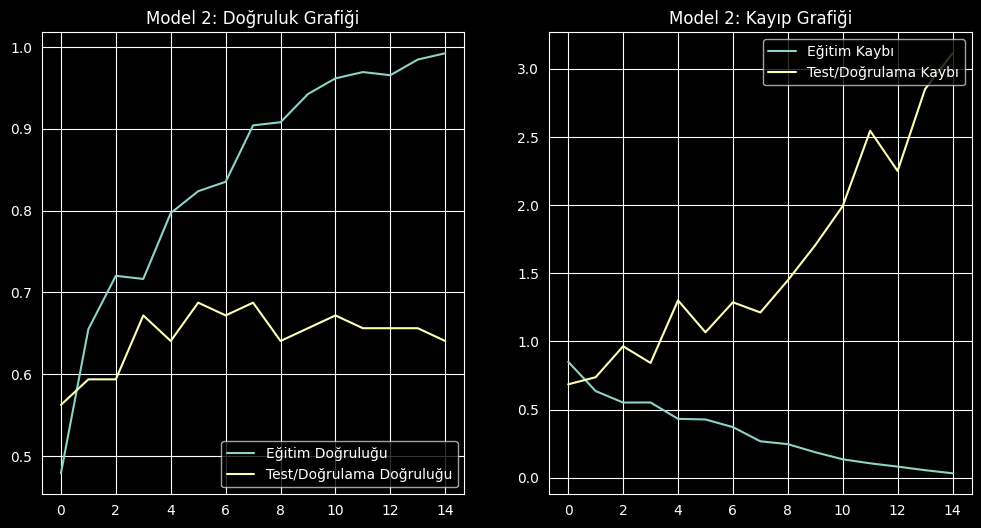

Model 2 Test Doğruluğu: %64.06


In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Test/Doğrulama Doğruluğu')
plt.legend(loc='lower right')
plt.title('Model 2: Doğruluk Grafiği')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Test/Doğrulama Kaybı')
plt.legend(loc='upper right')
plt.title('Model 2: Kayıp Grafiği')

plt.show()

print(f"Model 2 Test Doğruluğu: %{val_acc[-1]*100:.2f}")